<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Ignacio Meza, Gabriel Iturra
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1:
- Nombre de alumno 2:


### **Link de repositorio de GitHub:** `http://....`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [ ]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/Lab_10/'
except:
    print('Ignorando conexión drive-colab')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv(path+'diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?.

In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.preprocessing import FunctionTransformer
import joblib

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(df.drop('Diabetes', axis=1), df['Diabetes'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

In [ ]:
numeric_features= ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ],
    remainder='passthrough'
)


In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
pipeline_xgb = Pipeline([
    #('bmi',bmi_categorizer),
    ('preprocessor', preprocessor),
    ('classifier', xgb_model)
])

In [ ]:
from sklearn.metrics import accuracy_score,precision_score ,recall_score,f1_score

pipeline_xgb.fit(X_train, y_train)
y_val_pred_xgb = pipeline_xgb.predict(X_val)
mae_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
print(f'MAE for XGBclassifier: {mae_xgb}')

joblib.dump(pipeline_xgb, 'xgb_model.pkl')


precision_xgb = precision_score(y_val, y_val_pred_xgb)
recall_xgb = recall_score(y_val, y_val_pred_xgb)
f1_xgb = f1_score(y_val, y_val_pred_xgb)

print(f'Precision for XGBclassifier: {precision_xgb}')
print(f'Recall for XGBclassifier: {recall_xgb}')
print(f'F1-score for XGBclassifier: {f1_xgb}')

accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
print(f'Accuracy for XGBclassifier: {accuracy_xgb}')

MAE for XGBclassifier: 0.24878598071644734
Precision for XGBclassifier: 0.7310561444837064
Recall for XGBclassifier: 0.79054627795075
F1-score for XGBclassifier: 0.7596382674916706
Accuracy for XGBclassifier: 0.7512140192835527


In [ ]:
xgb_model2 = xgb.XGBClassifier()
xgb_model2.fit(X_train, y_train)
y_val_pred_xgb2 = xgb_model2.predict(X_val)
mae_xgb2 = mean_absolute_error(y_val, y_val_pred_xgb2)
print(f'MAE for XGBclassifier: {mae_xgb2}')
precision_xgb = precision_score(y_val, y_val_pred_xgb)
recall_xgb = recall_score(y_val, y_val_pred_xgb)
f1_xgb = f1_score(y_val, y_val_pred_xgb)

print(f'Precision for XGBclassifier: {precision_xgb}')
print(f'Recall for XGBclassifier: {recall_xgb}')
print(f'F1-score for XGBclassifier: {f1_xgb}')

accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
print(f'Accuracy for XGBclassifier: {accuracy_xgb}')

MAE for XGBclassifier: 0.24878598071644734
Precision for XGBclassifier: 0.7310561444837064
Recall for XGBclassifier: 0.79054627795075
F1-score for XGBclassifier: 0.7596382674916706
Accuracy for XGBclassifier: 0.7512140192835527


Se realizan dos iteraciones de modelos uno utilizando un pipeline y un standardscaler, y el otro simplemente utilizando el modelo de xgboost. De las metricas obtenidas se tiene que ambos tienen los mismos resultados, por lo cual se utiliza el segundo modelo ya que este conserva el nombre de las columnas en los resultados finales.

De los resultados se observa que este modelo es un buen predictor de daiebetes teniendo scores superando el 70% en la mayoria y con un error promedio bastante bajo.

Las metricas utilizadas explican lo siguiente:
Accuracy en conjunto con el MAE entregan que tan correctas son las predicciones realizadas, siendo el accuracy el porcentaje de predicciones correctas y el MAE el porcentaje de incorrectas.

La precision da un score de las predicciones positivas correctas sobre el total de predicciones positivas. Esto nos da una medida de la relevancia de las predicciones realizadas, y sirve cuando el costo de falsos positivos es alto

El recall indica la cantidad de predicciones positivas correctas sobre el total de positivas reales. Este valor es importante cuando el  valor de falsos negativos es alto.

Finalmente el f1-score entrega un balance entre precision y recall. Tiene gran importancia cuando la distribucion de clases esta balanceada.

Como la clasificacion de pacientes con diabetes corresponde al diagnostico de una enfermedad bastante severa se debe minimizar el caso de falsos negativos, por lo que un buen Recall seria una buena metrica. En el caso del clasificación realizada se obtiene que Recall es el valor mas alto entre las metricas, por lo que la predicción es bastante util para el caso especifico de este dataset.

Sobre las metricas utilizadas para medir la predictibilidad, se podria decir que estas metricas son mas que nada globales, por lo cual no se podria asegurar que el modelo esta haciendo una buena elección de features solamente analizando estos valores.

## 3. Importancia de las features con XGBoost (0.5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

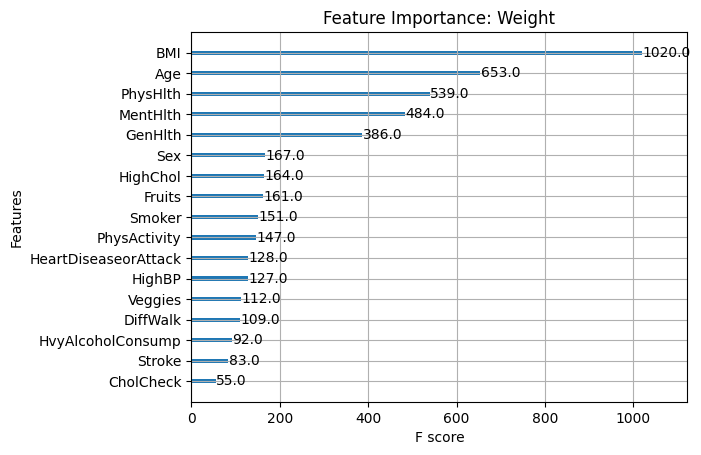

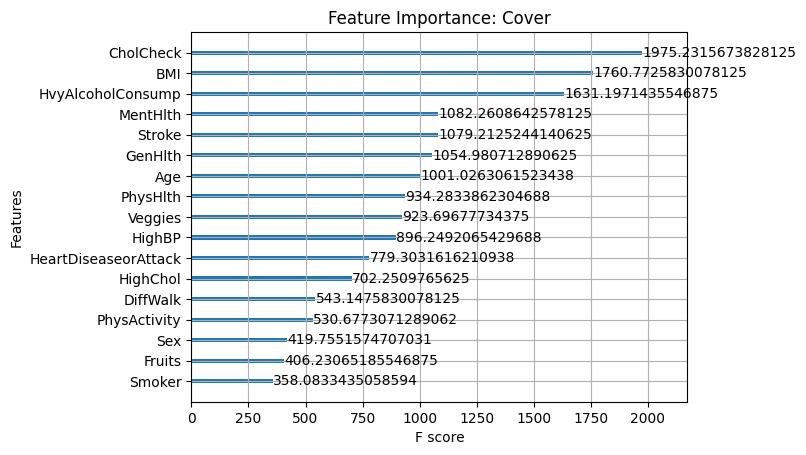

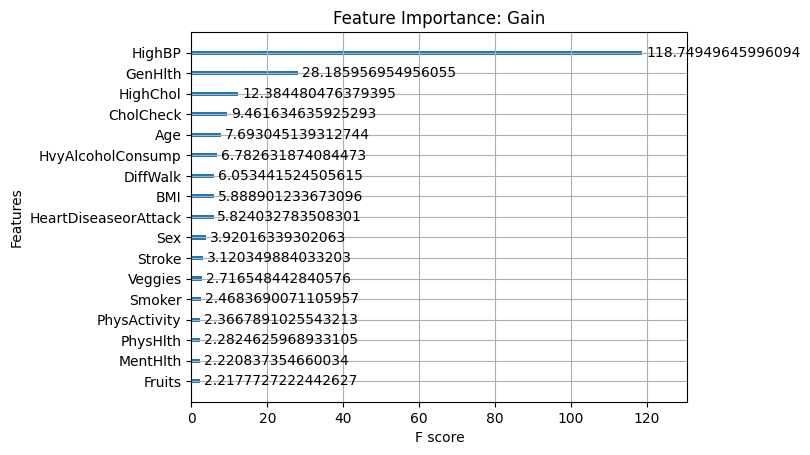

In [ ]:
import matplotlib.pyplot as plt
feature_names = X_train.columns
xgb.plot_importance(xgb_model2, importance_type='weight', title='Feature Importance: Weight')
plt.show()

xgb.plot_importance(xgb_model2, importance_type='cover', title='Feature Importance: Cover')
plt.show()

xgb.plot_importance(xgb_model2, importance_type='gain', title='Feature Importance: Gain')
plt.show()


Analizando los tres gráficos, se podría decir que la única característica que tiene una gran importancia en los tres métodos corresponde a "GenHlth" o salud general, la cual tiene un peso bastante alto en los tres.

Por otro lado, los métodos de "weight" y "cover" tienen un alto valor para el BMI, lo cual tiene sentido si este es un valor bastante presente en todos los árboles de XGBoost. Además, debido a su presencia en cada árbol, tiene sentido que su "Gain" no sea muy alto, ya que una característica que es muy común en todas las decisiones probablemente no tiene un gran impacto en un clasificador.

También, "Age" es una característica bastante prevalente, lo cual tiene bastante sentido en términos de diabetes, teniendo en cuenta los dos tipos de diabetes, una que es comúnmente diagnosticada en la niñez y otra cuando los pacientes son más adultos. En este sentido, la característica de edad debería tener un gran impacto en la clasificación.

De lo anterior, se podría decir que los tres métodos son relativamente compatibles en sus resultados y complementarios respecto a otros. En general, depende de las cualidades propias de cada característica, pero utilizar los métodos entrega una visión bastante global sobre la importancia de cada característica.

Las desigualdades obtenidas vienen dadas por la variabilidad intrínseca a cada método, teniendo en cuenta que el "weight" toma la cantidad de veces que aparece una característica en cada árbol del modelo, el "cover" toma en cuenta que la característica es utilizada en una gran cantidad de puntos en los árboles, y finalmente, "gain" toma en cuenta el impacto que tiene la característica en el desempeño del modelo.

Estas importancias son claves para obtener la interpretabilidad de un modelo de árboles cuando son de relativa simplicidad, ya que permiten identificar las importancias relativas de cada característica y ver cuáles tienen un mayor impacto en la predicción de los modelos. Pero cuando estos modelos llegan a ser muy profundos, estos métodos dejan de ser tan intuitivos, debido a que las relaciones entre características llegan a ser mucho más complejas, lo cual vuelve la interpretabilidad del modelo mucho menos evidente.

## 4. Métodos Agnósticos Globales (1.0 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np

result = permutation_importance(xgb_model2, X_test, y_test, n_repeats=30, random_state=42)

result

{'importances_mean': array([0.02868029, 0.00313854, 0.01188741, 0.00450064, 0.03651474,
        0.00240511, 0.00523408, 0.00012859, 0.00240034, 0.0018336 ,
        0.00255275, 0.05793209, 0.00259085, 0.00341954, 0.00397676,
        0.00167643, 0.01856456]),
 'importances_std': array([0.00286965, 0.00125509, 0.00216226, 0.0009243 , 0.00252471,
        0.00133118, 0.00153861, 0.00090691, 0.00097771, 0.00084615,
        0.00079099, 0.00373304, 0.00127299, 0.00164606, 0.00133832,
        0.00093831, 0.00219738]),
 'importances': array([[ 0.03386198,  0.03157594,  0.02986141,  0.03014716,  0.02828976,
          0.02857551,  0.02743249,  0.03086155,  0.03157594,  0.03257608,
          0.02614659,  0.0324332 ,  0.02514645,  0.02843263,  0.02957565,
          0.03143306,  0.02500357,  0.02743249,  0.02657523,  0.02500357,
          0.02914702,  0.02657523,  0.03114731,  0.02743249,  0.0292899 ,
          0.03229033,  0.02757537,  0.02614659,  0.02028861,  0.02857551],
        [ 0.00271467,  0.

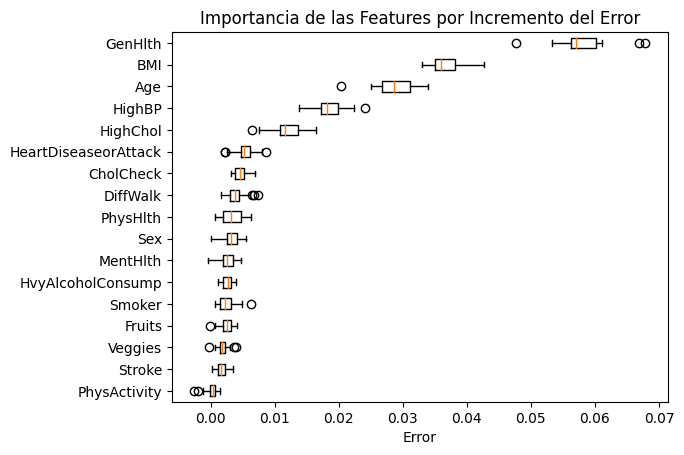

In [ ]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(df.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

¿Cómo mide la importancia de las features su propuesta?


La evaluación de la importancia de las características se realiza mediante el método de permutación. Este enfoque analiza cómo la perturbación aleatoria de cada característica impacta el rendimiento global del modelo. Para cuantificar esta importancia, se calcula la disminución en una métrica de evaluación específica, como la precisión o la exactitud, al permutar cada característica. Aquellas características cuya permutación genera una mayor reducción en el rendimiento del modelo se consideran más importantes. Esta disminución en el rendimiento indica que la información contenida en esas características es crucial para las predicciones del modelo, destacando así su relevancia en el proceso de toma de decisiones del modelo de machine learning.





¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?


Las 5 características más relevantes en términos de su impacto en la salida del modelo son las siguientes:

* GenHlth (Salud General): La variable de salud general refleja de manera significativa en la predicción del modelo. Este hallazgo tiene sentido, ya que la condición de salud general puede influir sustancialmente en la probabilidad de desarrollar diabetes.

* BMI (Índice de Masa Corporal): El BMI, o índice de masa corporal, emerge como un factor crucial en las predicciones del modelo. Esta alta importancia se alinea perfectamente con la relación bien documentada entre la obesidad y la diabetes, destacando la relevancia de controlar el peso corporal en la evaluación del riesgo.

* Age (Edad): La edad figura como un factor de riesgo clave para la diabetes, especialmente en el caso de la diabetes tipo 2. La alta importancia atribuida a la edad en el modelo es coherente, ya que envejecer se correlaciona con un mayor riesgo de desarrollar la enfermedad.

* HighBP (Presión Arterial Alta): La presión arterial alta, reconocida como un factor de riesgo conocido para la diabetes, muestra una alta importancia en las predicciones del modelo. Este resultado es coherente con la comprensión médica de que la hipertensión puede contribuir significativamente al riesgo de diabetes.

* HighChol (Colesterol Alto): La influencia del colesterol alto en las predicciones del modelo también tiene sentido, ya que el colesterol elevado se ha asociado con el desarrollo de la diabetes. La inclusión de esta característica entre las más relevantes respalda la importancia de considerar los niveles de colesterol en la evaluación de riesgos relacionados con la diabetes.

Estos hallazgos sugieren que el modelo está capturando de manera efectiva las relaciones esperadas entre estas variables y la probabilidad de diabetes, brindando una base sólida para la interpretación y aplicación de sus predicciones.



¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?

El enfoque de permutación proporciona una perspectiva más sólida y agnóstica en comparación con el análisis de importancia de características anterior. Este método considera las interacciones entre las características y su verdadero impacto en la capacidad predictiva del modelo.


* **Ventajas:**

1. Robustez: Al ser un método agnóstico, la robustez del enfoque de permutación radica en su capacidad para adaptarse a una amplia variedad de algoritmos de aprendizaje automático, independientemente de su naturaleza específica.


2. Estimación de Confianza: La capacidad para calcular la desviación estándar de las importancias brinda una herramienta valiosa para evaluar la estabilidad y confiabilidad de las evaluaciones, aportando una medida de certeza a las conclusiones obtenidas.

3. Evaluación Directa: Ofrece una evaluación directa del impacto de cada característica en el rendimiento del modelo, proporcionando una medida precisa de su importancia. Este enfoque directo facilita la comprensión clara de cómo cada característica contribuye a las predicciones del modelo.


* **Desventajas:**


1. Interpretación Limitada: Aunque revela la importancia relativa de las características, el enfoque de permutación no proporciona información sobre relaciones causales o interacciones entre las características. La interpretación se limita a la contribución individual de cada característica en lugar de revelar patrones complejos de dependencia.

2. Costoso Computacionalmente: Dado que implica la permutación de características múltiples veces, este método puede ser computacionalmente costoso, especialmente en conjuntos de datos extensos. La necesidad de realizar múltiples permutaciones puede aumentar el tiempo de procesamiento.

3. Dependencia del Tamaño de Muestra: En conjuntos de datos pequeños, las estimaciones pueden ser menos precisas debido a la limitada cantidad de datos disponibles para el análisis. Esto destaca la importancia de considerar el tamaño de la muestra al interpretar los resultados.

## 5. Métodos Agnósticos Locales (2.0 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### 5.1 Calculando Shap Values (0.4 puntos)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.4 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb_model2)
shap_values = explainer(X_test)

[23:36:20] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [ ]:
import shap
explainer = shap.TreeExplainer(xgb_model2)
shap_values = explainer(X_test)

[23:36:39] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [ ]:
shap_values.values.shape

(6999, 17)

In [ ]:
shap_values.values[1,:]

array([ 0.09380282, -0.06717047,  0.23208027,  0.02174223, -0.08375261,
        0.01130277, -0.03242114, -0.01060442,  0.01639502, -0.02107755,
        0.03410571,  0.14248781,  0.03749271,  0.0363309 , -0.05702486,
       -0.02909459,  0.4515198 ], dtype=float32)

El numero obtenido como resultado para cada feature corresponde al aporte de cada caracteristica para detectar el target de la clasificación, en este caso el diagnostico de dibetes. Esto se realiza a nivel local, por lo cual existe cierta variabilidad entre cada indice utilizado, lo cual equivale a distintos pacientes. En este contexto la positividad o la negatividad de cada valor indican un aporte positivo o negativo a la deteccion de la etiqueta positiva.


### 5.2 Aporte local (0.4 puntos)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

In [ ]:
idx = 1

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[idx,:],
                X_test.iloc[idx,:],
                link="logit")

In [ ]:
idx = 9

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[idx,:],
                X_test.iloc[idx,:],
                link="logit")

In [ ]:
idx = 150

shap.initjs()
shap.force_plot(explainer.expected_value,
                shap_values.values[idx,:],
                X_test.iloc[idx,:],
                link="logit")

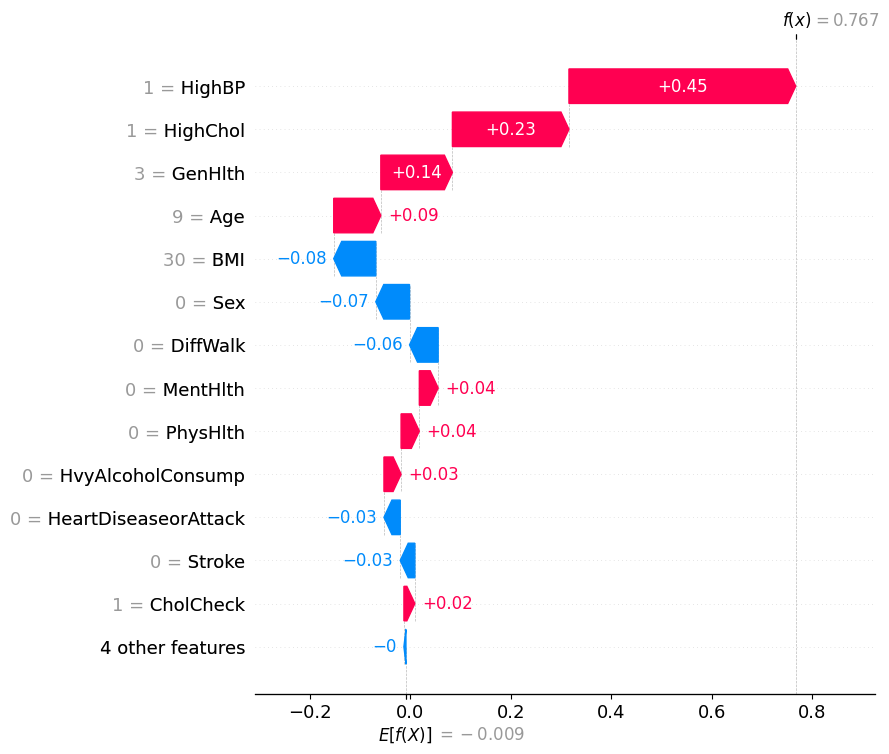

In [ ]:
idx=1
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

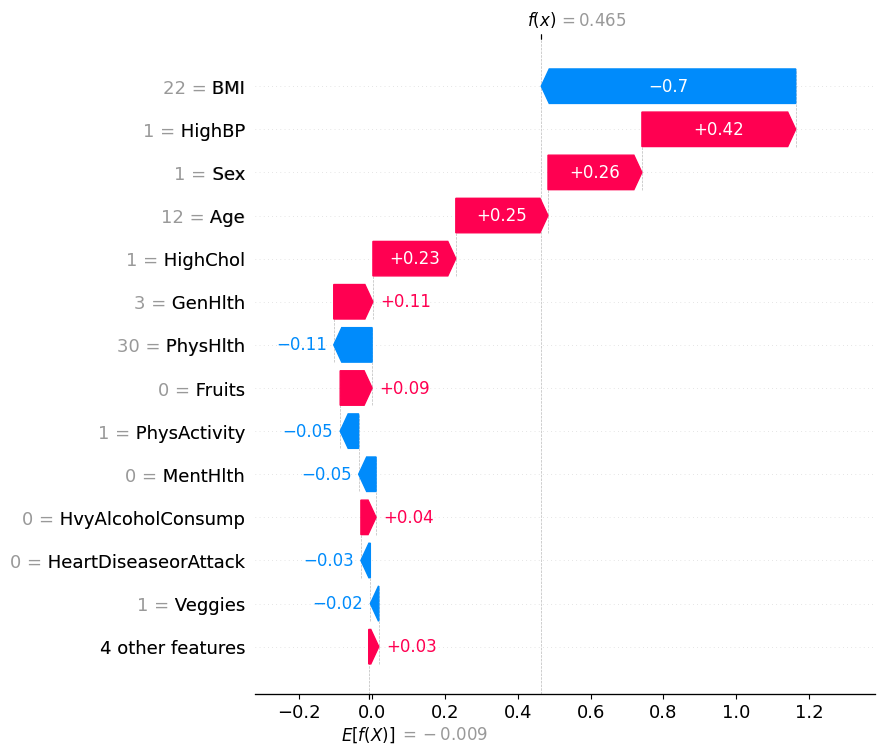

In [ ]:
idx=9
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

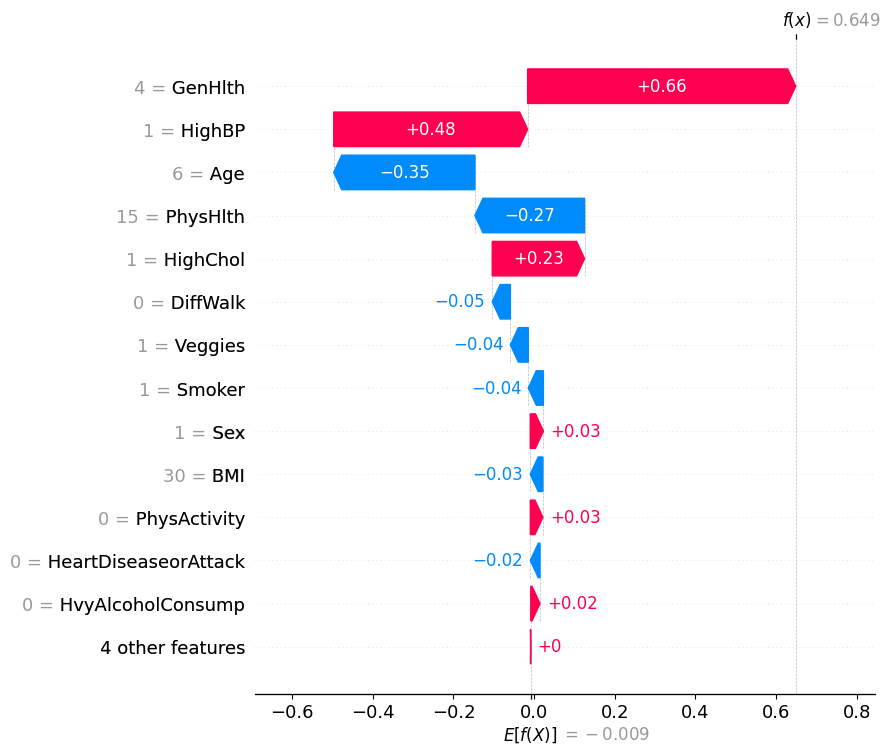

In [ ]:
idx=150
shap.plots.waterfall(shap_values[idx,:],
                     max_display=14)

En estos análisis locales realizados, se puede observar que la predicción de la diabetes está principalmente relacionada con 5 características generalmente: salud general, presión sanguínea, edad, colesterol alto y el índice de masa corporal.

En general, la presión sanguínea afecta de forma positiva al diagnóstico de diabetes, al igual que una salud general con un valor alto (el cual posiblemente indica una mala salud general). También se observa que el colesterol alto afecta de manera positiva al diagnóstico de diabetes.

Por otro lado, el valor de edad tiene un impacto positivo cuando este es alto, pero un impacto negativo cuando es bajo. Esto también se observa con el índice de masa corporal, donde un valor bajo afecta de forma muy negativa el diagnóstico positivo, mientras que un BMI alto no afecta demasiado.

Estas conclusiones no se pueden llegar a generalizar para todo el dataset, pero pueden ayudar a explicar de forma anecdótica algunas predicciones realizadas por el modelo, además de entregar información crucial sobre hacia dónde enfocar el análisis general de la predicción del modelo.

### 5.3 Aporte global (0.4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

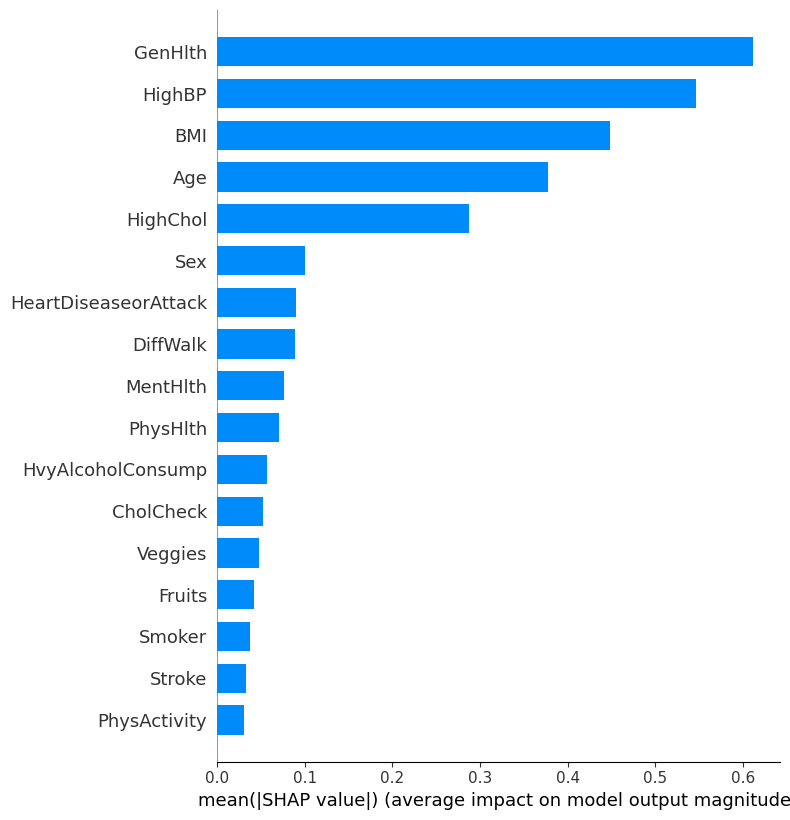

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

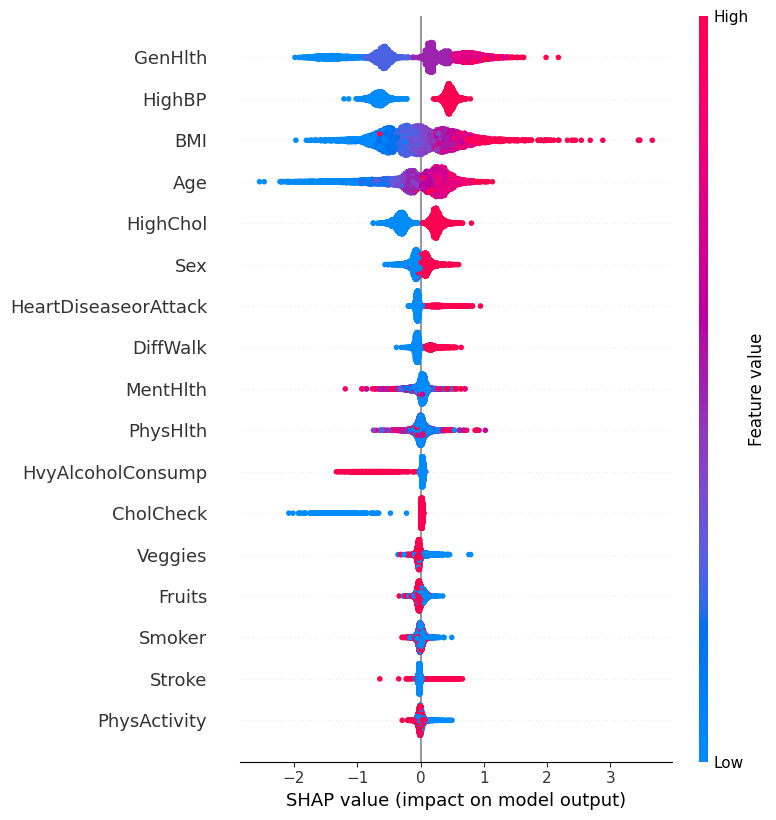

In [ ]:
shap.summary_plot(shap_values, X_test)

La diferencia de esta visualización en comparación con las obtenidas a nivel de instancia se observa, más que nada, en el orden de las características obtenidas y su impacto en la predicción. Además, se observa la negatividad o positividad de cada característica con respecto a lo anterior.

En el primer gráfico, se puede observar que las variables más importantes son básicamente las mismas que se mencionaron en el análisis de instancias, pero no se puede concluir respecto a su importancia positiva o negativa. En cambio, en el segundo gráfico, se puede ver si la característica es capaz de impactar la predicción de forma negativa o positiva, dependiendo de los valores de la característica. Por ejemplo, se observa que las edades más bajas tienen un impacto sumamente negativo respecto al diagnóstico de diabetes, mientras que una edad más alta afecta, pero no en tanta medida.

Por otro lado, un BMI bajo afecta moderadamente de forma negativa, pero un BMI alto afecta bastante de forma positiva. A excepción de un outlier, que tiene un BMI sumamente alto, pero un SHAP value que indica un impacto negativo sobre el diagnóstico.

Por otro lado, se observan variables como "highalcoholconsumption" y "cholCheck", las cuales claramente son binarias y en valores positivos de consumo de alcohol dan un resultado sumamente negativo sobre el diagnóstico de diabetes y lo contrario con "colcheck".

Este tipo de análisis, integrando resultados locales a una visión global de la importancia de cada característica, permite ver el impacto de cada característica en la predicción del modelo considerando cada instancia generada por SHAP, lo cual permite un análisis mucho más holístico de la predicción.

### 5.4 Scatter plot (0.4 puntos)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [ ]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

probas = xgb_model2.predict_proba(X_test)[:, 1]

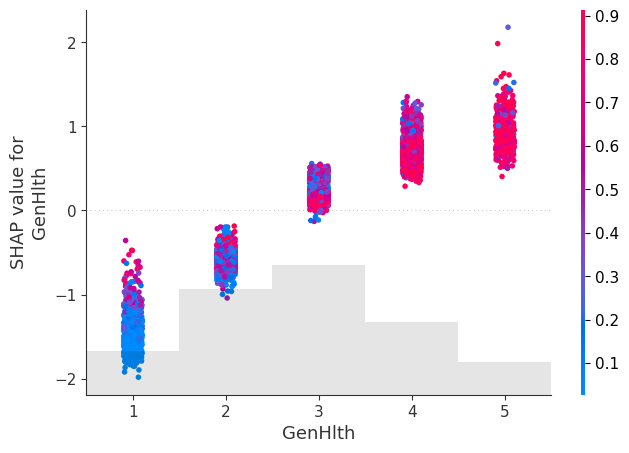

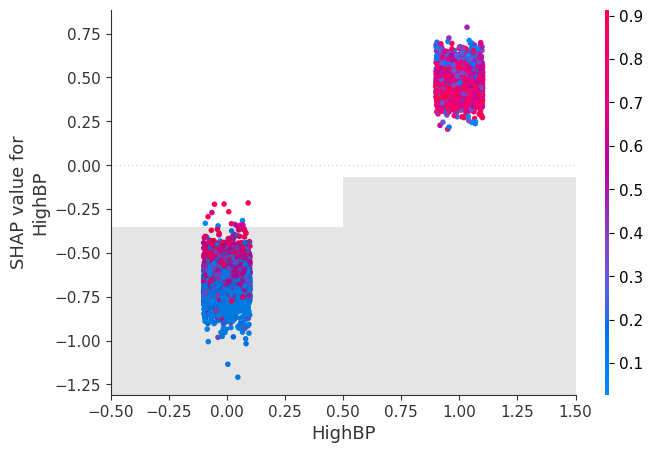

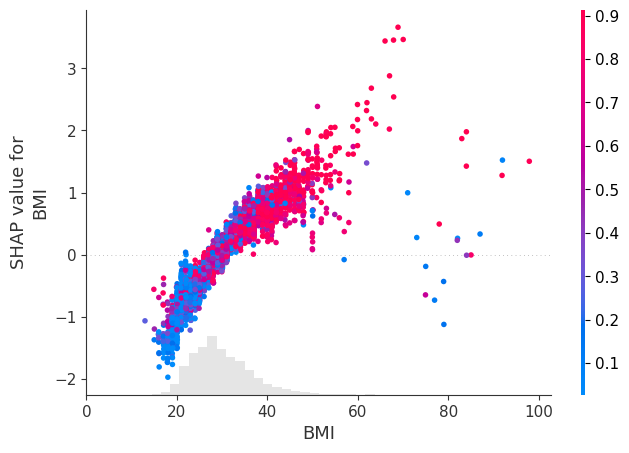

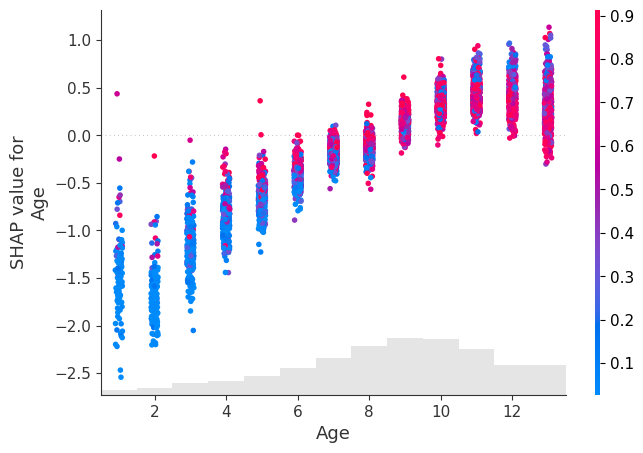

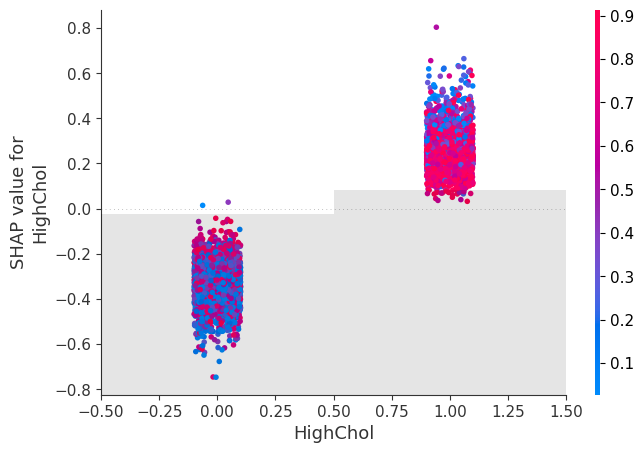

In [ ]:
for name in feature_importance_names[:5]:
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name],
                       color=probas, xmin=0)


De los gráficos obtenidos, se puede concluir que, en gran parte de las variables analizadas, los valores más bajos suelen estar relacionados con un SHAP más negativo y viceversa. Este valor indica que el impacto de estas variables suele indicar un diagnóstico negativo cuando el SHAP es bajo. Sin embargo, al observar la probabilidad de cada punto, se puede evidenciar que aunque se encuentre en un valor bajo de la feature, en cuanto aumenta en el eje de los SHAP values, es más probable el diagnóstico de diabetes.

Es por esto que en los primeros gráficos se observa que los valores más bajos de la variable tienen un rango de SHAP values que parten con una probabilidad de diabetes muy baja, pero a medida que sube el SHAP, aumenta la probabilidad.

El gráfico del BMI también es interesante al tener un rango de valores mucho más continuo, donde se puede observar la relación bastante lineal entre el aumento de BMI, de SHAP values y de probabilidad.

En las features con más importancia, la relación entre la feature, el SHAP value y la probabilidad son bastante claras, pero a medida que se desciende en impacto de feature, se observa que estas relaciones no son tan claras. Este es el caso de la feature de "HighChol", la cual tiene dos opciones y se observa que en el valor menor, aunque se observa un rango de SHAP values parecido a las features anteriores, la distribución de probabilidad para ese conjunto es mucho menos consistente que, por ejemplo, la feature de salud general.


### 5.5 Partial Dependence Plot (0.4 puntos)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

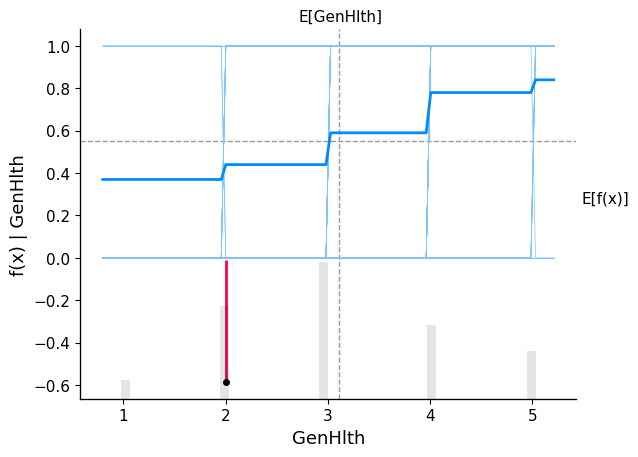

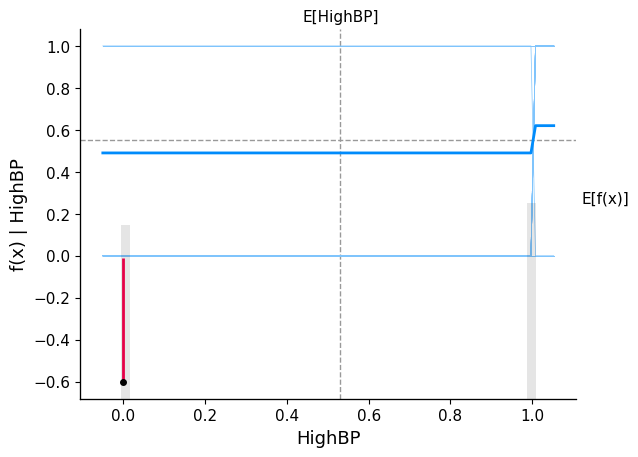

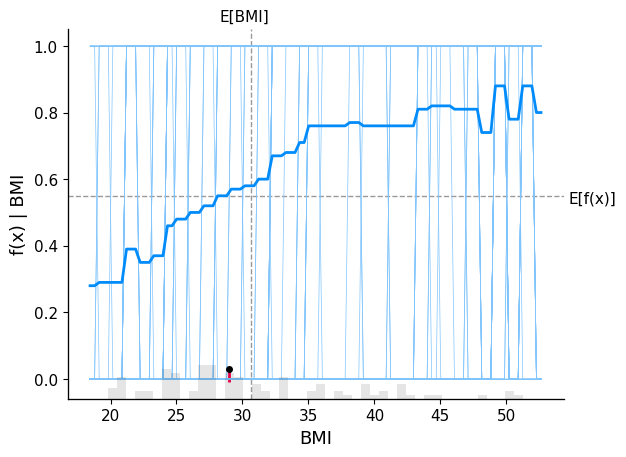

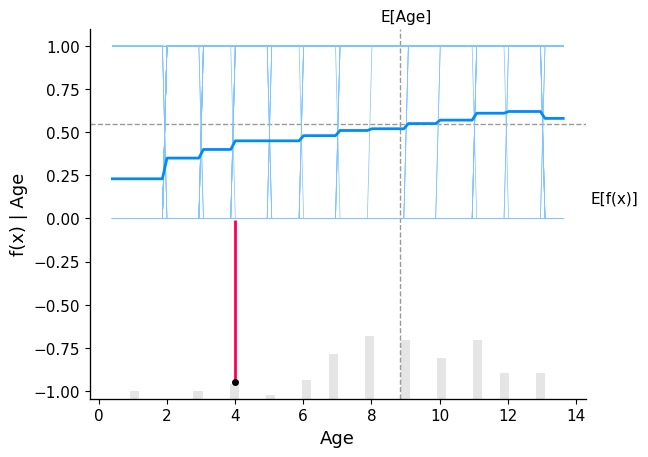

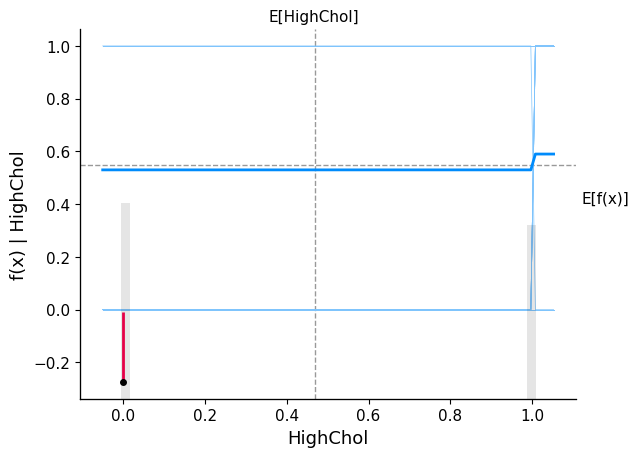

In [ ]:
for name in feature_importance_names[:5]:
  X100 = shap.utils.sample(X_test, 100)

  sample_ind = 20
  shap.partial_dependence_plot(
      name, xgb_model2.predict, X100, model_expected_value=True,
      feature_expected_value=True, ice=True,
      shap_values=shap_values[sample_ind:sample_ind+1,:]
  )

¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

* Salud General (GenHlth):   Al observar la variable de Salud General, notamos que un aumento en esta medida se correlaciona con un incremento en la predicción de la probabilidad de desarrollar diabetes según nuestro modelo. Este hallazgo sugiere que la salud general de un individuo, tal como se mide en este contexto específico, puede ser un indicador relevante para la predicción de la diabetes.

* Presión Arterial Alta (HighBP) y Colesterol Alto (HighChol): Se observa un ligero aumento en la probabilidad de diabetes cuando estas variables están activas. Es importante señalar que el índice de estas variables debe ser alto para que la probabilidad aumente, ya que, de lo contrario, se mantiene constante.

* Índice de Masa Corporal (BMI): La relación entre el BMI y la probabilidad de diabetes muestra un aumento no lineal. A medida que el BMI aumenta, la probabilidad de diabetes tiende a incrementarse, aunque esta relación no sigue un patrón lineal, sino que tiene oscilaciones con una tendencia logarítmica. Esto sugiere que a medida que el BMI se eleva, el riesgo de diabetes se incrementa, pero este aumento no es uniforme.

* Edad (Age): Como se observa, a medida que la edad aumenta, la probabilidad de diabetes tiende a hacerlo, aunque no de manera tan pronunciada. A pesar de que la edad es un factor en el desarrollo de enfermedades, no es un factor decisivo en la predicción de diabetes según nuestro modelo.

## 6. Sistema de Reglas! (1.0 puntos)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
!pip install alibi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 7.1 MB/s eta 0:00:00


In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
y_test.to_numpy()[3001]

0.0

In [ ]:
# Inserte su código para generar sistema de reglas aquí
predict_fn = lambda x: xgb_model2.predict(x)
xplainer = AnchorTabular(predict_fn, xgb_model2.feature_names_in_, seed=1)
explainer.fit(X_train.to_numpy())

class_names = [ "Paciente_no_diabetes","Paciente_diabetes"]

idx = 1000
# explicar predicción idx 1000


explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

idx = 3001
# explicar predicción idx 3001

explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

idx = 5751
# explicar predicción idx 5751

explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

Prediction:  Paciente_diabetes
Anchor: GenHlth > 3.00 AND HighBP > 0.00
Precision: 0.95
Coverage: 0.20
Prediction:  Paciente_diabetes
Anchor: GenHlth > 3.00 AND HighBP > 0.00 AND HeartDiseaseorAttack > 0.00
Precision: 0.99
Coverage: 0.07
Prediction:  Paciente_diabetes
Anchor: GenHlth > 3.00 AND BMI > 33.00 AND Age > 7.00
Precision: 0.98
Coverage: 0.07


Con las reglas propuestas señale a cuánta población es posible explicar con estas reglas e indique la precisión que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta seña lando el impacto que tienen sus reglas sobre todo el conjunto de datos.

Como se puede observar, para las reglas anteriores se observa que la poblacion que se puede explicar se da por la variable Coverage, en donde se observa que segun la regla puede ir de 7% a 20%. Tambien se observan las precisiones obtenidas las cuales van del 95% a 99%, lo que significa que estas reglas explican correctamente la predicción del modelo para las observaciones especificadas en la mayoría de los casos.

No obstante, se observa que la cobertura de estas reglas es baja. Este indicador sugiere que dichas reglas solo son aplicables a una fracción limitada de la población de datos.

En sintesis Las reglas propuestas, parecen simplistas en su intento de explicar las predicciones de manera global. Por otro lado parece ser que la variable HighBP tiene un alto impacto para explicar a la población, lo que sugiere que en conjunto de estas con otras variables podrian ofrecer una explicacion mas completa y manteniendo la alta precision de las predicciones en el conjunto de datos en su totalidad



# Retrospectiva... (1.0 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>